In [1]:
# Load libraries

# # Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.ticker as ticker 
import matplotlib.patches as patches
import matplotlib as matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Analysis
import os
import numpy as np 
import xarray as xr
import datetime
from   datetime import date, timedelta
import pandas as pd 
import pickle
import scipy.stats as stats
import glob
# import Ngl
# import Nio 
# import metpy.calc as mpc
# from metpy.units import units


In [2]:
import warnings
warnings.filterwarnings('ignore')


## Read in data

In [3]:
## Set which coupling timestep to use (in minutes)
# cplTime = 5 
cplTime = 20 


In [4]:
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/SCAM_runs/FullyCoupledFromCTSM/sfcFluxesFixed/'

if cplTime==20:
    hmgATMfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_sfcFluxFixed_HMG.001.cam.h0.2015-06-01-84585.nc'
    htgATMfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_sfcFluxFixed_HTG.001.cam.h0.2015-06-01-84585.nc'

    htgLNDfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_sfcFluxFixed_HTG.001.clm2.h0.2015-06-01-84585.nc'
    hmgLNDfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_20minDT_sfcFluxFixed_HMG.001.clm2.h0.2015-06-01-84585.nc'

    
elif cplTime==5:
    htgATMfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_5minDT_sfcFluxFixed_HTG.001.cam.h0.2015-06-01-84585.nc'
    hmgATMfile = dataDir+'FSCAM.T42_T42.FSCAM.T42_T42.CLASP_fullycoupled_5minDT_sfcFluxFixed_HMG.001.cam.h0.2015-06-01-84585.nc'

    htgLNDfile = dataDir+'FSCAM.T42_T42.CLASP_fullycoupled_5minDT_sfcFluxFixed_HTG.001.clm2.h0.2015-06-01-84585.nc'
    hmgLNDfile = dataDir+'FSCAM.T42_T42.FSCAM.T42_T42.CLASP_fullycoupled_5minDT_sfcFluxFixed_HMG.001.clm2.h0.2015-06-01-84585.nc'
    
    
with xr.open_dataset(htgATMfile, decode_times=True) as HTGcamDS:
    HTGcamDS['time'] = HTGcamDS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(htgLNDfile, decode_times=True) as HTGclmDS:
    HTGclmDS['time'] = HTGclmDS.indexes['time'].to_datetimeindex()

with xr.open_dataset(hmgATMfile, decode_times=True) as HMGcamDS:
    HMGcamDS['time'] = HMGcamDS.indexes['time'].to_datetimeindex()
    
with xr.open_dataset(hmgLNDfile, decode_times=True) as HMGclmDS:
    HMGclmDS['time'] = HMGclmDS.indexes['time'].to_datetimeindex()
    

In [5]:
## Discard the first day... 
iTimeStart = np.where(HMGcamDS.time.values >= np.datetime64('2015-06-02'))[0]
timeArr = np.arange(iTimeStart[0], len(HMGcamDS.time.values))

HTGcamDS = HTGcamDS.isel(time=timeArr)
HTGclmDS = HTGclmDS.isel(time=timeArr)

HMGcamDS = HMGcamDS.isel(time=timeArr)
HMGclmDS = HMGclmDS.isel(time=timeArr)


## Make some plots for comparison

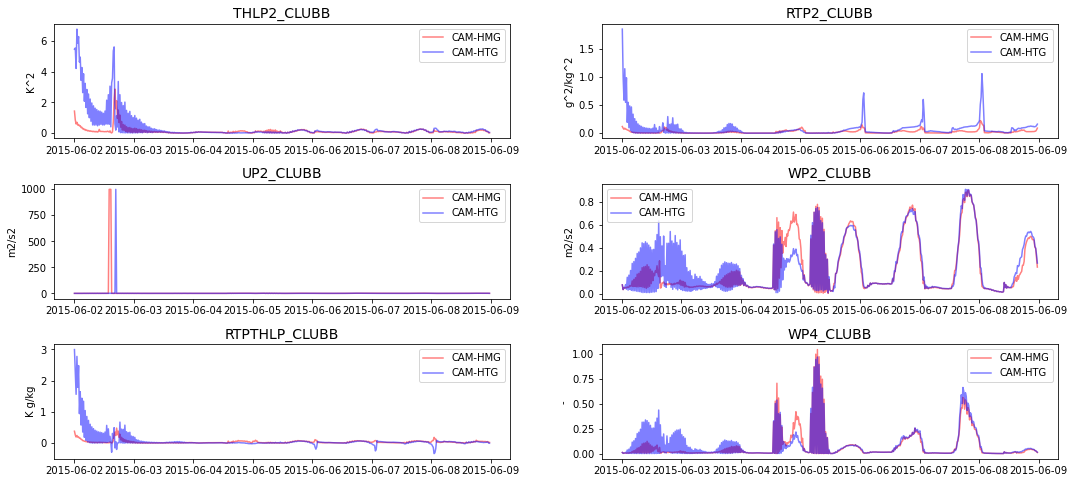

In [6]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['THLP2_CLUBB','RTP2_CLUBB','UP2_CLUBB','WP2_CLUBB','RTPTHLP_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'r-', alpha=0.5, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'b-', alpha=0.5, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()


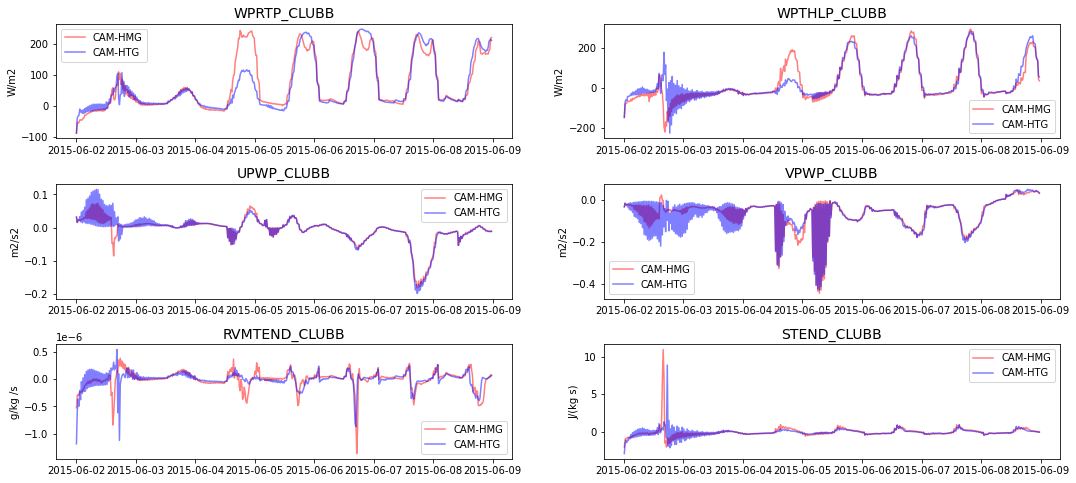

In [7]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPRTP_CLUBB','WPTHLP_CLUBB','UPWP_CLUBB','VPWP_CLUBB','RVMTEND_CLUBB','STEND_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'r-', alpha=0.5, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'b-', alpha=0.5, label='CAM-HTG')
    
#     axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS_lev2[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   '-', color='orange', alpha=0.5, label='CAM-HMG (lev2)')
#     axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS_lev2[ATM_varNames[iVar]].values[:,-1,:,:]),
#                   '-',color='cyan', alpha=0.5, label='CAM-HTG (lev2)')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()


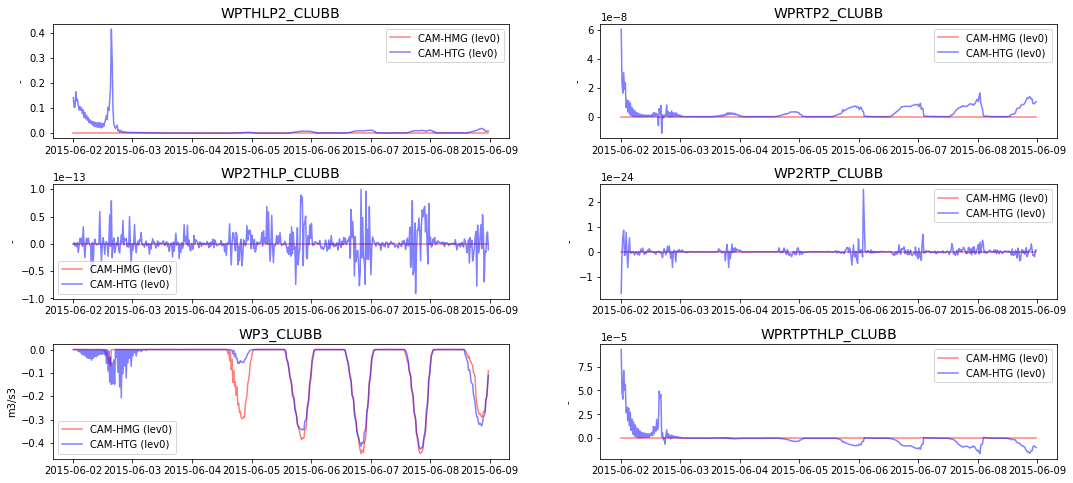

In [8]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP2_CLUBB','WPRTP2_CLUBB','WP2THLP_CLUBB','WP2RTP_CLUBB','WP3_CLUBB','WPRTPTHLP_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'r-', alpha=0.5, label='CAM-HMG (lev0)')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-1,:,:]),
                  'b-', alpha=0.5, label='CAM-HTG (lev0)')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()


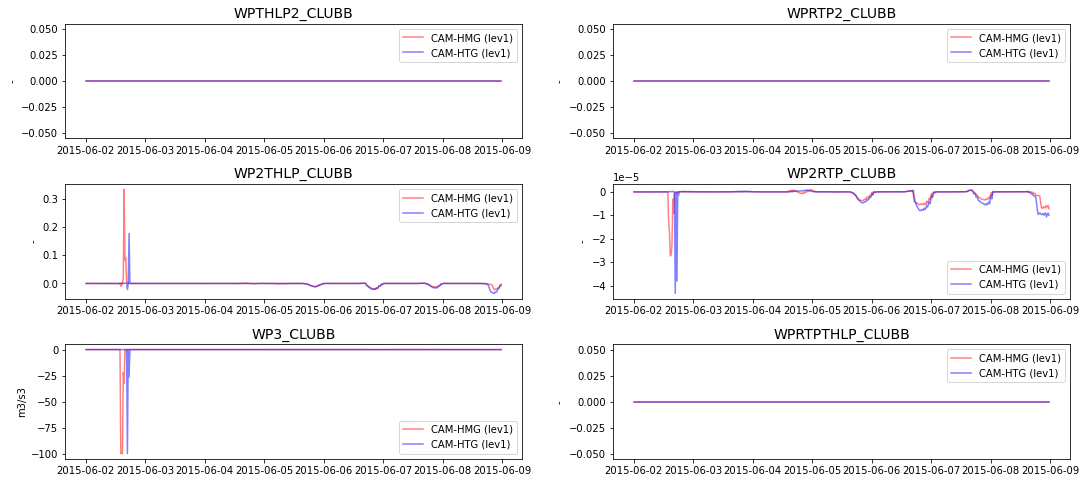

In [9]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['WPTHLP2_CLUBB','WPRTP2_CLUBB','WP2THLP_CLUBB','WP2RTP_CLUBB','WP3_CLUBB','WPRTPTHLP_CLUBB'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values[:,-2,:,:]),
                  'r-', alpha=0.5, label='CAM-HMG (lev1)')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values[:,-2,:,:]),
                  'b-', alpha=0.5, label='CAM-HTG (lev1)')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()



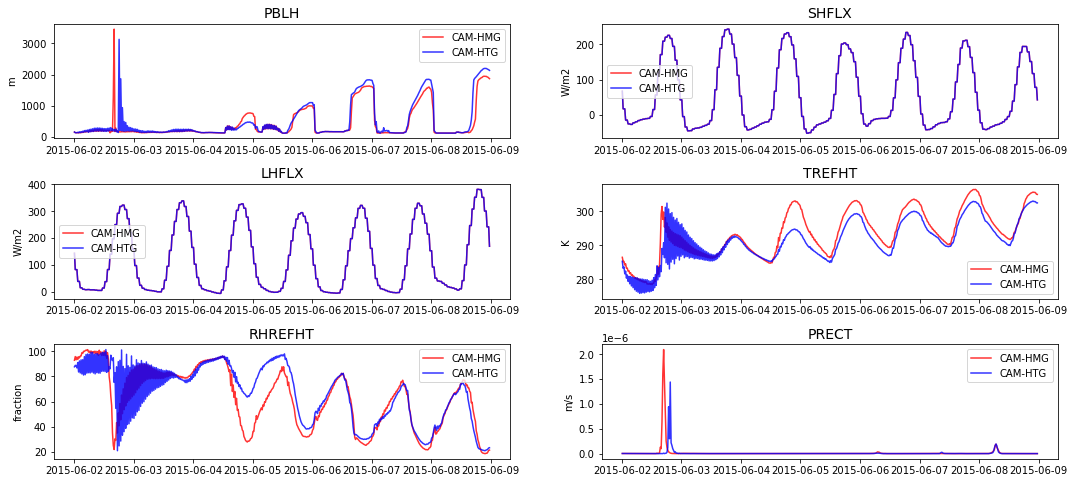

In [10]:
fig,axs = plt.subplots(3,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['PBLH','SHFLX','LHFLX','TREFHT','RHREFHT','PRECT'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(6):

        
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.8, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.8, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=14)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units)
    axs[iVar].legend()


Text(0.5, 1.0, 'CLDHGH')

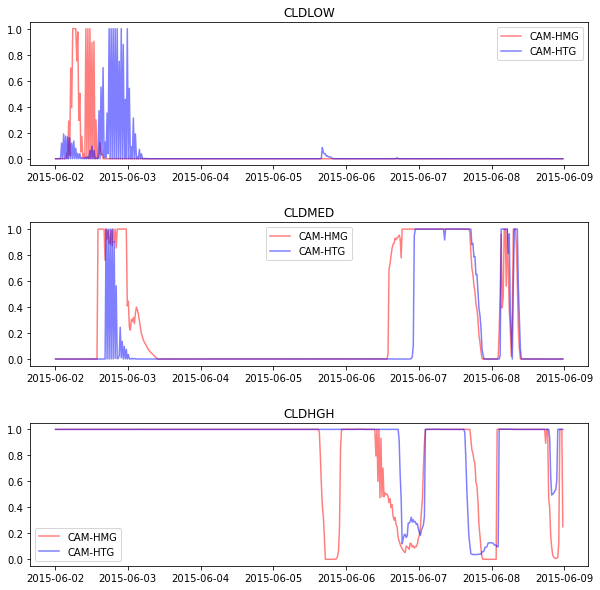

In [11]:
fig,axs = plt.subplots(3,1, figsize=(10,10))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

axs[0].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS.CLDLOW.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[0].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS.CLDLOW.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[0].legend()
axs[0].set_title('CLDLOW')

axs[1].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS.CLDMED.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[1].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS.CLDMED.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[1].legend()
axs[1].set_title('CLDMED')

axs[2].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS.CLDHGH.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[2].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS.CLDHGH.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[2].legend()
axs[2].set_title('CLDHGH')


In [15]:
HMGclmDS

<xarray.Dataset>
Dimensions:                        (cft: 2, glc_nec: 10, hist_interval: 2, levdcmp: 1, levgrnd: 25, levlak: 10, levsoi: 20, lndgrid: 1, ltype: 9, natpft: 15, nvegwcs: 4, time: 2010)
Coordinates:
  * levgrnd                        (levgrnd) float32 0.01 0.04 ... 28.87 42.0
  * levsoi                         (levsoi) float32 0.01 0.04 0.09 ... 6.94 8.03
  * levlak                         (levlak) float32 0.05 0.6 2.1 ... 34.33 44.78
  * levdcmp                        (levdcmp) float32 1.0
  * time                           (time) datetime64[ns] 2015-06-02T00:04:45....
Dimensions without coordinates: cft, glc_nec, hist_interval, lndgrid, ltype, natpft, nvegwcs
Data variables:
    mcdate                         (time) int32 ...
    mcsec                          (time) int32 ...
    mdcur                          (time) int32 ...
    mscur                          (time) int32 ...
    nstep                          (time) int32 ...
    time_bounds                    (time, hist_interval) object ...
    date_written                   (time) |S16 ...
    time_written                   (time) |S16 ...
    lon                            (lndgrid) float32 ...
    lat                            (lndgrid) float32 ...
    area                           (lndgrid) float32 ...
    landfrac                       (lndgrid) float32 ...
    landmask                       (lndgrid) float64 ...
    pftmask                        (lndgrid) float64 ...
    nbedrock                       (lndgrid) float64 ...
    ZSOI                           (levgrnd, lndgrid) float32 ...
    DZSOI                          (levgrnd, lndgrid) float32 ...
    WATSAT                         (levgrnd, lndgrid) float32 ...
    SUCSAT                         (levgrnd, lndgrid) float32 ...
    BSW                            (levgrnd, lndgrid) float32 ...
    HKSAT                          (levgrnd, lndgrid) float32 ...
    ZLAKE                          (levlak, lndgrid) float32 ...
    DZLAKE                         (levlak, lndgrid) float32 ...
    ATM_TOPO                       (time, lndgrid) float32 ...
    BCDEP                          (time, lndgrid) float32 ...
    BTRANMN                        (time, lndgrid) float32 ...
    DSL                            (time, lndgrid) float32 ...
    DSTDEP                         (time, lndgrid) float32 ...
    DSTFLXT                        (time, lndgrid) float32 ...
    EFLXBUILD                      (time, lndgrid) float32 ...
    EFLX_DYNBAL                    (time, lndgrid) float32 ...
    EFLX_GRND_LAKE                 (time, lndgrid) float32 ...
    EFLX_LH_TOT                    (time, lndgrid) float32 ...
    EFLX_LH_TOT_R                  (time, lndgrid) float32 ...
    ELAI                           (time, lndgrid) float32 ...
    ERRH2O                         (time, lndgrid) float32 ...
    ERRH2OSNO                      (time, lndgrid) float32 ...
    ERRSEB                         (time, lndgrid) float32 ...
    ERRSOI                         (time, lndgrid) float32 ...
    ERRSOL                         (time, lndgrid) float32 ...
    ESAI                           (time, lndgrid) float32 ...
    FCEV                           (time, lndgrid) float32 ...
    FCOV                           (time, lndgrid) float32 ...
    FCTR                           (time, lndgrid) float32 ...
    FGEV                           (time, lndgrid) float32 ...
    FGR                            (time, lndgrid) float32 ...
    FGR12                          (time, lndgrid) float32 ...
    FH2OSFC                        (time, lndgrid) float32 ...
    FIRA                           (time, lndgrid) float32 ...
    FIRA_R                         (time, lndgrid) float32 ...
    FIRE                           (time, lndgrid) float32 ...
    FIRE_R                         (time, lndgrid) float32 ...
    FLDS                           (time, lndgrid) float32 ...
    FPSN                           (time, lndgrid) float

Text(0.5, 1.0, 'U10')

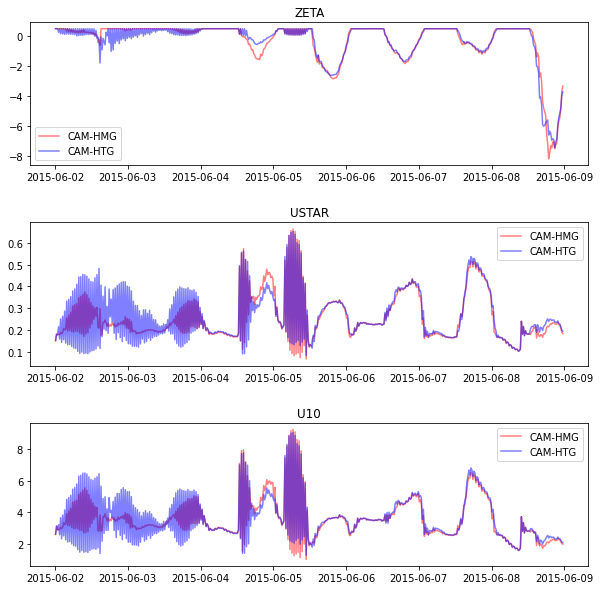

In [12]:
fig,axs = plt.subplots(3,1, figsize=(10,10))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

axs[0].plot(HMGclmDS['time'].values, np.squeeze(HMGclmDS.ZETA.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[0].plot(HMGclmDS['time'].values, np.squeeze(HTGclmDS.ZETA.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[0].legend()
axs[0].set_title('ZETA')

axs[1].plot(HMGclmDS['time'].values, np.squeeze(HMGclmDS.USTAR.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[1].plot(HTGclmDS['time'].values, np.squeeze(HTGclmDS.USTAR.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[1].legend()
axs[1].set_title('USTAR')

axs[2].plot(HMGclmDS['time'].values, np.squeeze(HMGclmDS.U10.values), 'r-', alpha=0.5, label='CAM-HMG')
axs[2].plot(HTGclmDS['time'].values, np.squeeze(HTGclmDS.U10.values), 'b-', alpha=0.5, label='CAM-HTG')
axs[2].legend()
axs[2].set_title('U10')


### Plot for CAM7 report? 

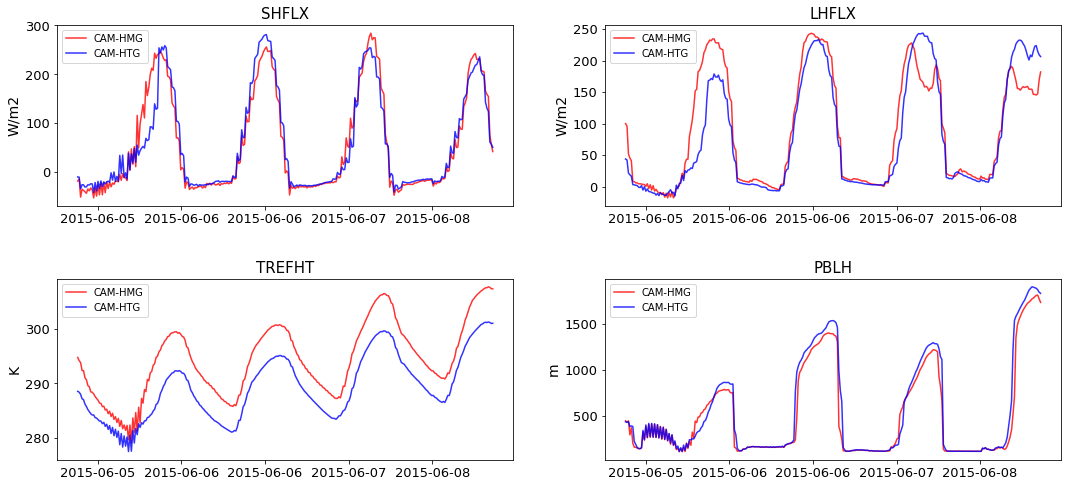

In [27]:
fig,axs = plt.subplots(2,2, figsize=(18,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=0.4)

ATM_varNames = np.asarray(['SHFLX','LHFLX','TREFHT','PBLH'])
# LND_varNames = np.asarray(['THLP2_CLUBB','QP2_CLUBB','UP2_CLUBB','WP2_CLUBB','WP3_CLUBB','WP4_CLUBB'])

for iVar in range(4):
#     if cplTime==20:
#         axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(noCplDS[ATM_varNames[iVar]].values),
#                       'k-', label='CAM-NoCpl')
    axs[iVar].plot(HMGcamDS['time'].values, np.squeeze(HMGcamDS[ATM_varNames[iVar]].values),
                  'r-', alpha=0.8, label='CAM-HMG')
    axs[iVar].plot(HTGcamDS['time'].values, np.squeeze(HTGcamDS[ATM_varNames[iVar]].values),
                  'b-', alpha=0.8, label='CAM-HTG')

    axs[iVar].set_title(ATM_varNames[iVar],fontsize=15)
    axs[iVar].set_ylabel(HMGcamDS[ATM_varNames[iVar]].units,fontsize=14)
    axs[iVar].legend()

    axs[iVar].tick_params(axis='both', which='major', labelsize=13)
    axs[iVar].xaxis.set_major_locator(plt.MaxNLocator(6))

## Scratch plots

In [48]:
HMGclmDS['time'].values[10:15]

array(['2015-06-03T02:49:44.995422000', '2015-06-03T03:09:45.001144000',
       '2015-06-03T03:29:44.996567000', '2015-06-03T03:49:45.002289000',
       '2015-06-03T04:09:44.997711000'], dtype='datetime64[ns]')

Text(0.5, 1.0, 'WP2THLP_CLUBB')

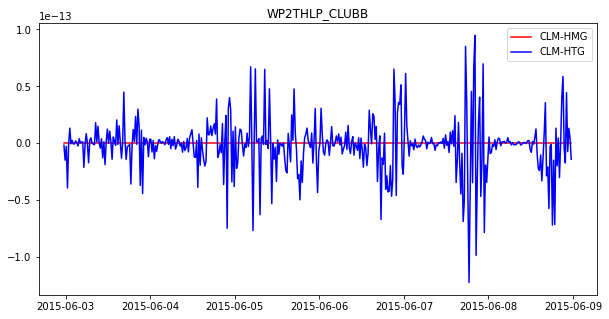

In [24]:
fig,axs = plt.subplots(1,1, figsize=(10,5))

axs.plot(HMGclmDS['time'].values, HMGclmDS.WP2THLP_CLUBB.values, 'r-', label='CLM-HMG')
axs.plot(HTGclmDS['time'].values, HTGclmDS.WP2THLP_CLUBB.values, 'b-', label='CLM-HTG')

axs.legend()
axs.set_title('WP2THLP_CLUBB')
